# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [148]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets
import warnings
warnings.filterwarnings('ignore')

In [218]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [96]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [49]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units_per_year=sfo_data.groupby('year').mean()
housing_units_per_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0
2015,632.540352,382295.0,3739.0
2016,697.643709,384242.0,4390.0


In [50]:
# Save the dataframe as a csv file
df=pd.DataFrame(sfo_data)
df.to_csv('Data/sfo_neighborhoods_census_data.csv', sep=',', index=True,header=True)
new_df = pd.read_csv('Data/sfo_neighborhoods_census_data.csv')
print(new_df)

     year            neighborhood  sale_price_sqr_foot  housing_units  \
0    2010            Alamo Square           291.182945         372560   
1    2010              Anza Vista           267.932583         372560   
2    2010                 Bayview           170.098665         372560   
3    2010        Buena Vista Park           347.394919         372560   
4    2010        Central Richmond           319.027623         372560   
..    ...                     ...                  ...            ...   
392  2016          Telegraph Hill           903.049771         384242   
393  2016              Twin Peaks           970.085470         384242   
394  2016  Van Ness/ Civic Center           552.602567         384242   
395  2016       Visitacion Valley           328.319007         384242   
396  2016           Westwood Park           631.195426         384242   

     gross_rent  
0          1239  
1          1239  
2          1239  
3          1239  
4          1239  
..          ...

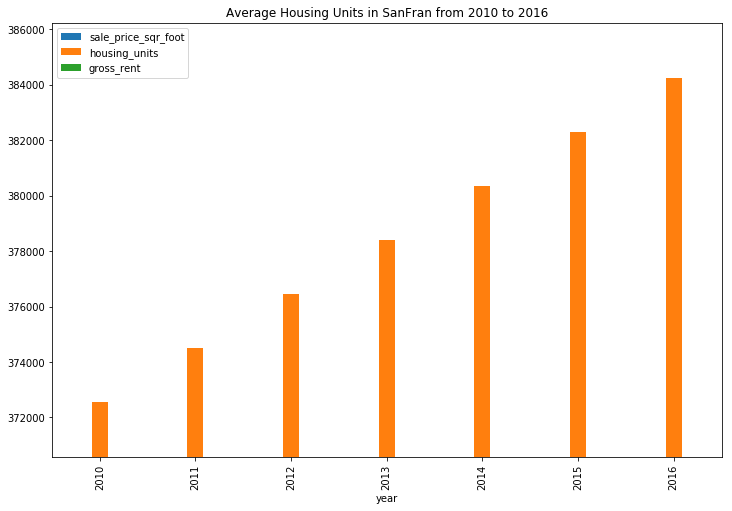

In [53]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
min = housing_units_per_year.min()['housing_units']
max = housing_units_per_year.max()['housing_units']
housing_units_per_year.plot.bar(ylim =(min-2000, max+2000),title="Average Housing Units in SanFran from 2010 to 2016",figsize=(12,8))




# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [153]:
# Calculate the average sale price per square foot and average gross rent
average_gross_rent = sfo_data["gross_rent"].groupby("year").mean()
average_gross_rent

year
2010    1239.0
2011    1530.0
2012    2324.0
2013    2971.0
2014    3528.0
2015    3739.0
2016    4390.0
Name: gross_rent, dtype: float64

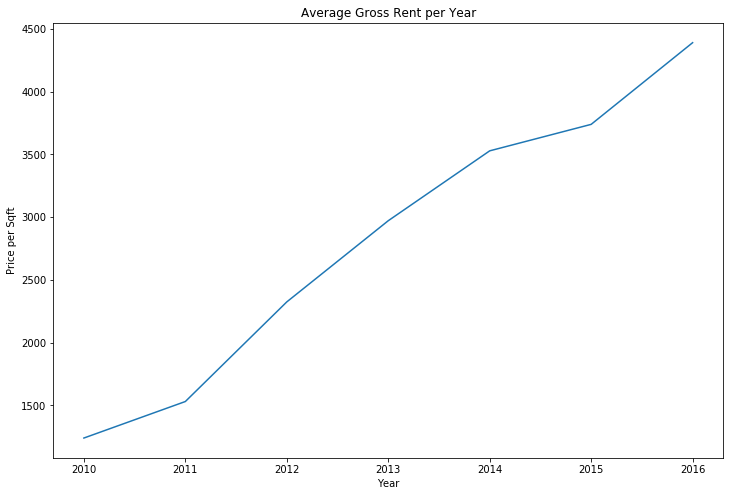

In [151]:
# Line chart for average gross rent
average_gross_rent.plot.line(title="Average Gross Rent per Year",xlabel="Year",ylabel="Price per Sqft",figsize=(12,8))

In [33]:
average_sale_price_per_square = sfo_data[ "sale_price_sqr_foot"].groupby("year").mean()
average_sale_price_per_square

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64

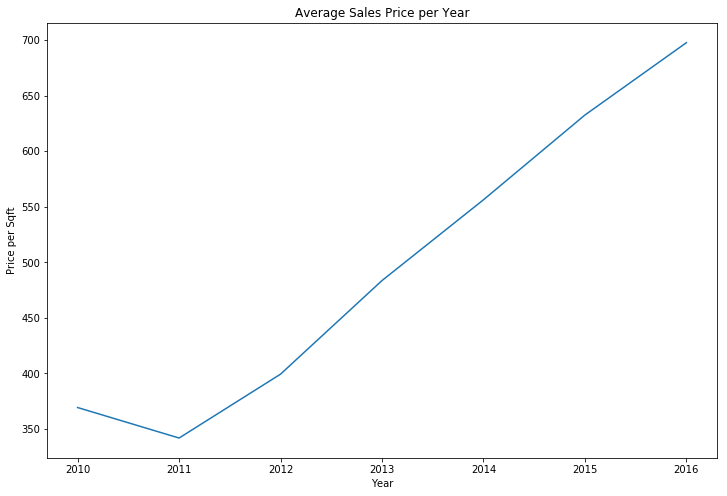

In [64]:
# Line chart for average sale price per square foot
average_sale_price_per_square.plot.line(title="Average Sales Price per Year",xlabel="Year",ylabel="Price per Sqft",figsize=(12,8))


- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [173]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_avg= (sfo_data.groupby([sfo_data.index,"neighborhood"]).mean())
neighborhood_avg_sales = neighborhood_avg[["sale_price_sqr_foot", "gross_rent"]]
neighborhood_df=pd.DataFrame(neighborhood_avg_sales).reset_index()
neighborhood_df.head()

,year,neighborhood,sale_price_sqr_foot,gross_rent
0,2010,Alamo Square,291.182945,1239.0
1,2010,Anza Vista,267.932583,1239.0
2,2010,Bayview,170.098665,1239.0
3,2010,Buena Vista Park,347.394919,1239.0
4,2010,Central Richmond,319.027623,1239.0


In [163]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
def choose_neighborhood(neighborhood):
    return neighborhood_df.loc[neighborhood_df['neighborhood']==neighborhood,:].hvplot.line(
        x="year",
        y="sale_price_sqr_foot",
        xlabel="Year",
        ylabel="Avg Price per sq ft",

        title="SF Avg  per Square foot per Year",
    )

neighborhood_choice = neighborhood_df["neighborhood"]

interact(choose_neighborhood, neighborhood=neighborhood_choice)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive06050')

In [170]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
def choose_neighborhood(neighborhood):
    return neighborhood_df.loc[neighborhood_df['neighborhood']==neighborhood,:].hvplot.line(
        x="year",
        y="gross_rent",
        xlabel="Year",
        ylabel="average monthly",
        title="Avg Monthly Rent",
    )

neighborhood_choice = neighborhood_df["neighborhood"]

interact(choose_neighborhood, neighborhood=neighborhood_choice)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive06254')

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [177]:
# Getting the data from the top 10 expensive neighborhoods to own

top_10 = sfo_data.groupby("neighborhood").mean()
top_10 = top_10.sort_values(by="sale_price_sqr_foot", ascending=False)
top_10_expensive = top_10.head(10)
top_10_expensive.reset_index(inplace=True)
top_10_expensive.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000


In [181]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_expensive.hvplot.bar(
    x="neighborhood", 
    xlabel="Neighborhood",
    y="sale_price_sqr_foot",
    ylabel="Avg Sales Price per Sqft",
    title="Top 10 Most Expensive Neighborhoods in San Francisco", 
    height=400,
    rot=90)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [183]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [188]:
# Plotting the data from the top 10 expensive neighborhoods
def choose_neighborhood(neighborhood):
    return sfo_data.loc[sfo_data['neighborhood']==neighborhood,:].hvplot.bar(
        x="housing_units",
        y=["gross_rent","sale_price_sqr_foot"],
        xlabel="Num Housing Units",
        ylabel="Neighborhood",
        title="Top 10 Expensive Neighborhoods in SF",
        height=400,
        rot=90
    )

neighborhood_choice = neighborhood_df["neighborhood"]

interact(choose_neighborhood, neighborhood=neighborhood_choice)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Bars, name='interactive07662')

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [196]:
# Load neighborhoods coordinates data
file_path = Path("C:/Users/sprin/Desktop/uofm-virt-fin-pt-12-2021-u-c/neighborhoods_coordinates.csv")
neighborhood_locations = pd.read_csv(file_path)
neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [203]:
# Calculate the mean values for each neighborhood
mean_neighborhood=sfo_data.groupby('neighborhood').mean()
mean_neighborhood.reset_index(inplace=True)
mean_neighborhood

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.00,2817.285714
1,Anza Vista,373.382198,379050.00,3031.833333
2,Bayview,204.588623,376454.00,2318.400000
3,Bayview Heights,590.792839,382295.00,3739.000000
4,Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...,...
68,West Portal,498.488485,376940.75,2515.500000
69,Western Addition,307.562201,377427.50,2555.166667
70,Westwood Highlands,533.703935,376454.00,2250.500000
71,Westwood Park,687.087575,382295.00,3959.000000


In [204]:
# Join the average values with the neighborhood locations
avg_values_loc = pd.concat([neighborhood_locations,mean_neighborhood], axis="columns", join="inner")
avg_values_loc.head()

,Neighborhood,Lat,Lon,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,Bernal Heights,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [219]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_1=px.scatter_mapbox(
    avg_values_loc,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title="Average Sale Price per Square Foot and Gross Rent in San Francisco"
)
map_1.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


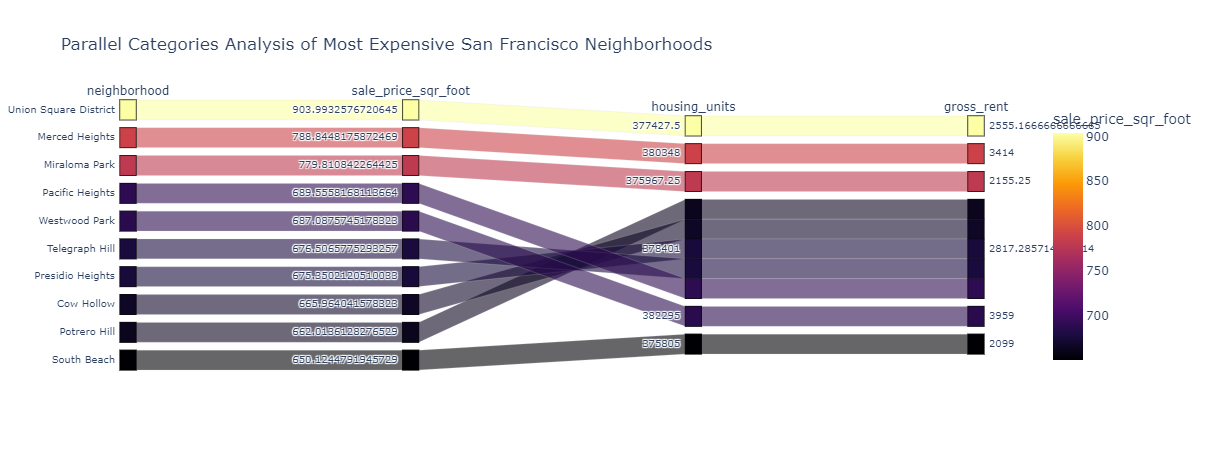

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

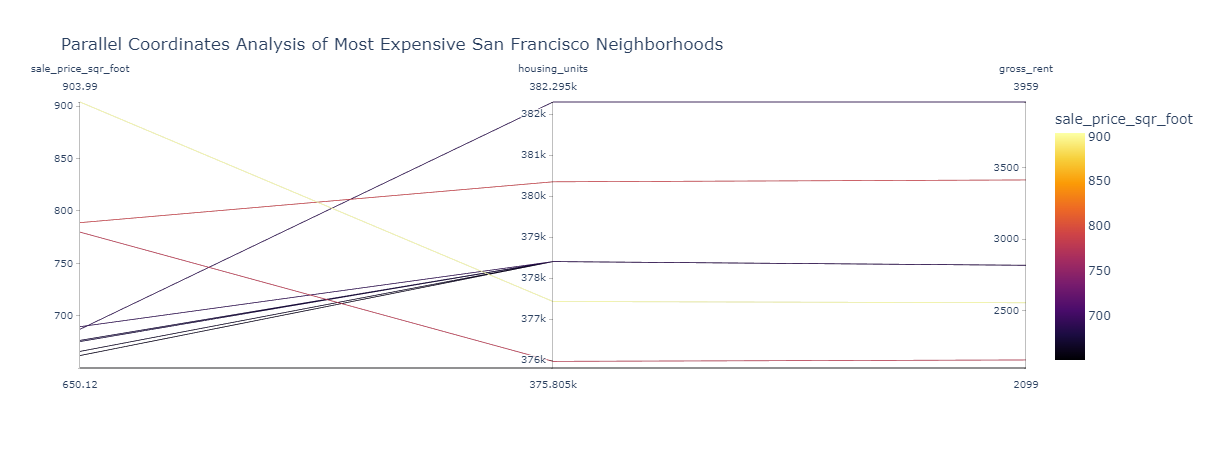

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

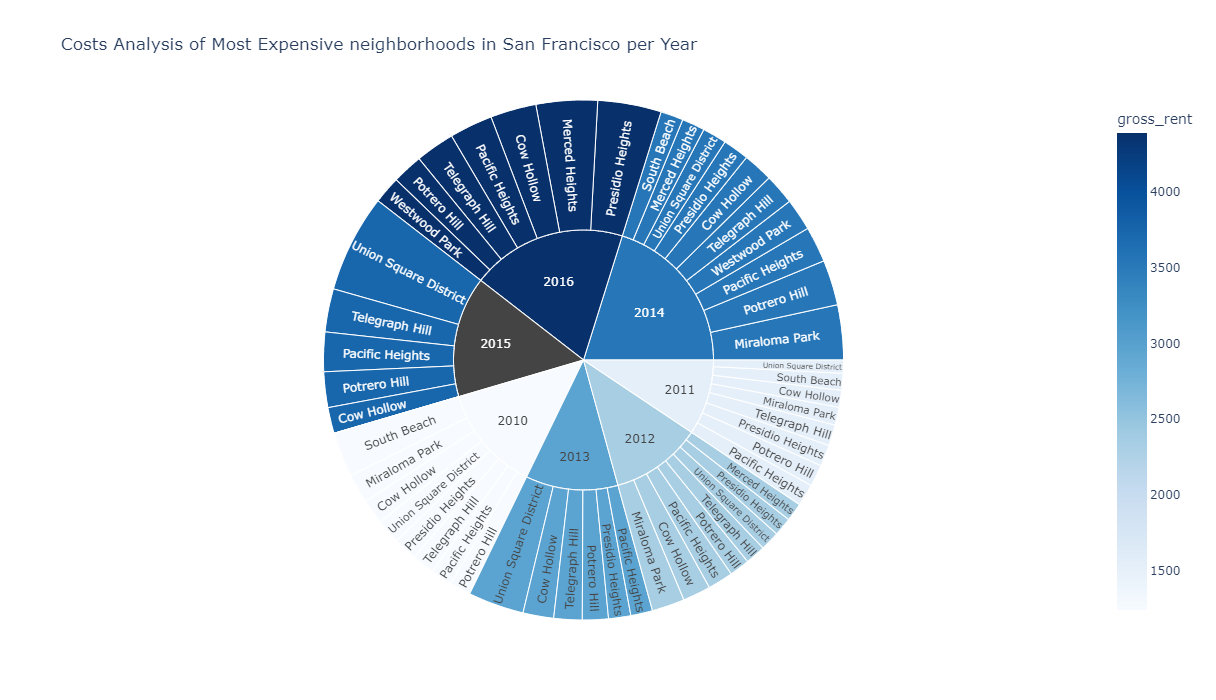

In [23]:
# Sunburst Plot
# YOUR CODE HERE!